# kNN-регресор для прогнозування заробітної плати

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Завантажуємо дані

#### Тренувальний набір даних

In [4]:
train_data = pd.read_csv('../datasets/mod_04_hw_train_data.csv')
train_data.head()

,Name,Phone_Number,Experience,Qualification,University,Role,Cert,Date_Of_Birth,Salary
0,Jennifer Hernandez,120-602-1220,3.0,Msc,Tier2,Mid,Yes,25/08/1972,98000
1,Timothy Walker,840-675-8650,5.0,PhD,Tier2,Senior,Yes,03/12/2013,135500
2,David Duran,556-293-8643,5.0,Msc,Tier2,Senior,Yes,19/07/2002,123500
3,Gloria Ortega,463-559-7474,3.0,Bsc,Tier3,Mid,No,19/02/1970,85000
4,Matthew Steele,968-091-7683,5.0,Bsc,Tier2,Senior,Yes,20/02/1970,111500


#### Валідаційний набір даних

In [5]:
valid_data = pd.read_csv('../datasets/mod_04_hw_valid_data.csv')
valid_data.head()

,Name,Phone_Number,Experience,Qualification,University,Role,Cert,Date_Of_Birth,Salary
0,Alvaro Johnson,320-636-8883,7,Bsc,Tier1,Senior,No,12/03/1978,109300
1,Austin Powers,903-121-1691,2,Msc,Tier1,Mid,Yes,13/03/1992,84800
2,Joshua Phil,673-972-2453,3,Bsc,Tier3,Mid,Yes,19/02/1988,98900
3,Mirinda Collins,310-364-6925,5,Msc,Tier2,Senior,No,20/03/1989,116500
4,Mustapha Green,401-249-3912,3,PhD,Tier1,Junior,Yes,21/03/1979,75800


## 2. Первинний дослідницький аналіз даних (EDA)

#### Інформація про тренувальний набір даних

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           249 non-null    object 
 1   Phone_Number   249 non-null    object 
 2   Experience     247 non-null    float64
 3   Qualification  248 non-null    object 
 4   University     249 non-null    object 
 5   Role           246 non-null    object 
 6   Cert           247 non-null    object 
 7   Date_Of_Birth  249 non-null    object 
 8   Salary         249 non-null    int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 17.6+ KB


#### Описова статистика числових ознак

In [7]:
train_data.describe()

,Experience,Salary
count,247.000000,249.000000
mean,3.441296,98186.746988
std,1.496471,23502.622217
min,1.000000,49500.000000
25%,2.000000,78500.000000
50%,4.000000,104500.000000
75%,5.000000,116500.000000
max,5.000000,141500.000000


#### Пропущені значення

In [8]:
train_data.isna().mean().sort_values(ascending=False)

Role             0.012048
Experience       0.008032
Cert             0.008032
Qualification    0.004016
Name             0.000000
Phone_Number     0.000000
University       0.000000
Date_Of_Birth    0.000000
Salary           0.000000
dtype: float64

#### Розподіл цільової змінної Salary

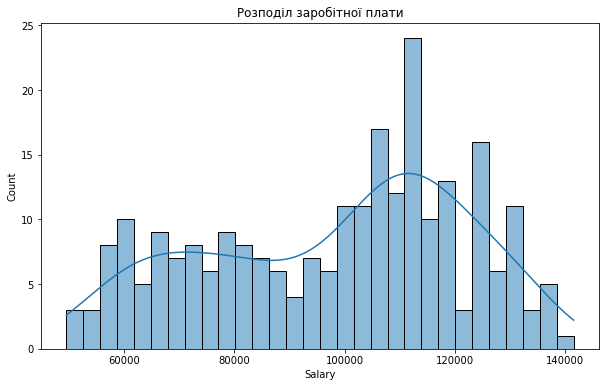

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Salary'], bins=30, kde=True)
plt.title('Розподіл заробітної плати')
plt.show()

## 3. Підготовка й обробка даних

#### Видаляємо стовпці, які не впливають на Salary

In [10]:
train_data.drop(['Phone_Number', 'Name', 'Date_Of_Birth', 'Qualification'], axis=1, inplace=True)
valid_data.drop(['Phone_Number', 'Name', 'Date_Of_Birth', 'Qualification'], axis=1, inplace=True)

#### Визначаємо тренувальну і тестову вибірки

In [11]:
X_train = train_data.drop(columns=['Salary'])
X_test = valid_data.drop(columns=['Salary'])

y_train = train_data['Salary']
y_test = valid_data['Salary']

#### Розділимо стовпці на числові та категоріальні

In [13]:
num_cols = train_data.select_dtypes(include=np.number).columns.drop('Salary')
num_cols

Index(['Experience'], dtype='object')

In [14]:
cat_cols = train_data.select_dtypes(include='object').columns
cat_cols

Index(['University', 'Role', 'Cert'], dtype='object')

#### Обробляємо числові ознаки

In [15]:
num_imputer = SimpleImputer(strategy='median').set_output(transform='pandas')

X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

#### Обробляємо категоріальні ознаки

In [16]:
cat_imputer = SimpleImputer(strategy='most_frequent')

X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

X_train_encoded = encoder.fit_transform(X_train[cat_cols])
X_test_encoded = encoder.transform(X_test[cat_cols])

X_train = np.concatenate([X_train[num_cols], X_train_encoded], axis=1)
X_test = np.concatenate([X_test[num_cols], X_test_encoded], axis=1)

## 4. Прогноз і оцінка точності моделі

#### Навчання моделі KNeighborsRegressor

In [17]:
model = KNeighborsRegressor(n_neighbors=33)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=33)

#### Прогноз і оцінка точності

In [18]:
y_pred = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape:.2%}')

MAPE: 3.61%


Модель KNeighborsRegressor з n_neighbors=33 показала точність з середньою абсолютною відносною помилкою (MAPE) 3.61%, що свідчить про хорошу здатність моделі прогнозувати заробітну плату на основі наданих даних.